In [3]:
import tensorflow as tf
import numpy as np
import keras
import tensorflow_model_optimization as tfmot
import platform
import time
import matplotlib.pyplot as plt
from PIL import Image
import os

os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'

In [3]:
with tfmot.quantization.keras.quantize_scope():
    model = tf.keras.models.load_model('./model/MobileNet_quantized.h5')

In [3]:
# model.summary()

In [4]:
layer = keras.Model(
    inputs=model.input,
    outputs=model.get_layer('quant_re_lu').output
)

img = keras.preprocessing.image.load_img('test.jpg')
data = keras.preprocessing.image.img_to_array(img)
data = np.expand_dims(data, axis=0)
result = layer.predict(data)

In [6]:
print(result[0,:,:,0])

[[0.3328968  0.48824865 0.8877248  ... 0.5770211  0.6214074  0.        ]
 [0.6214074  0.732373   0.9321111  ... 0.6657936  0.5104418  0.        ]
 [0.75456613 0.79895234 0.8433386  ... 0.5326349  0.06657936 0.        ]
 ...
 [0.9321111  0.8877248  0.8433386  ... 0.6436005  0.48824865 0.5770211 ]
 [0.8877248  0.75456613 0.6436005  ... 0.68798673 0.68798673 0.75456613]
 [0.90991795 0.8877248  0.90991795 ... 0.9986904  1.0652698  0.9986904 ]]


In [4]:
tflite_model = tf.lite.Interpreter(model_path='./model/MobileNet.tflite')
tflite_model.allocate_tensors()


In [5]:

img = keras.preprocessing.image.load_img('test.jpg')
data = keras.preprocessing.image.img_to_array(img)
data = np.expand_dims(data, axis=0)

In [ ]:
print(tflite_model.get_tensor_details()[32]['quantization_parameters']['scales'][0])

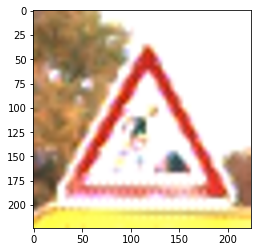

In [5]:
img = Image.open('F:/GTSRB_R/GTSRB_DATA_SET/Test/10109.png')
img = img.resize((224,224))
plt.imshow(img)
test_image = np.expand_dims(img, axis=0).astype(np.float32)

[[0.         0.         0.99609375 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]]


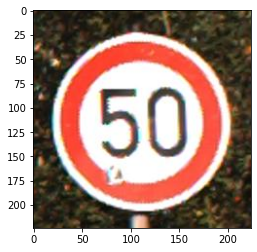

In [7]:
input_index = tflite_model.get_input_details()[0]['index']
output_index = tflite_model.get_output_details()[0]['index']

tflite_model.set_tensor(input_index, data)

tflite_model.invoke()
predictions = tflite_model.get_tensor(output_index)

plt.imshow(img)

print(predictions)